In [1]:
# Introduction to convolutional neural networks & tensorflow

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

🔑 Note: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)
In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

Getting a dataset to work with
Architecture of a convolutional neural network
A quick end-to-end example (what we're working towards)
Steps in modelling for binary image classification with CNNs
Becoming one with the data
Preparing data for modelling
Creating a CNN model (starting with a baseline)
Fitting a model (getting it to find patterns in our data)
Evaluating a model
Improving a model
Making a prediction with a trained model
Steps in modelling for multi-class image classification with CNNs
Same as above (but this time with a different dataset)
How you can use this notebook
You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.

# Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf


C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import requests

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
response = requests.get(url)

with open("pizza_steak.zip", "wb") as file:
    file.write(response.content)


In [5]:
%pwd

%cd C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak

C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak


In [6]:
import os

directory = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak"

# List all files and directories in the specified directory
for item in os.listdir(directory):
    print(item)

10_food_classes_all_data.zip
test
train


In [7]:
directory = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"

# List all files and directories in the specified directory
for item in os.listdir(directory):
    print(item)

pizza
steak


In [8]:
directory = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\steak"

# List all files and directories in the specified directory
for item in os.listdir(directory):
    print(item)

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
1081258.jpg
1090122.jpg
1093966.jpg
1098844.jpg
1100074.jpg
1105280.jpg
1117936.jpg
1126126.jpg
114601.jpg
1147047.jpg
1147883.jpg
1155665.jpg
1163977.jpg
1190233.jpg
1208405.jpg
1209120.jpg
1212161.jpg
1213988.jpg
1219039.jpg
1225762.jpg
1230968.jpg
1236155.jpg
1241193.jpg
1248337.jpg
1257104.jpg
126345.jpg
1264050.jpg
1264154.jpg
1264858.jpg
127029.jpg
1289900.jpg
1290362.jpg
1295457.jpg
1312841.jpg
1313316.jpg
1324791.jpg
1327567.jpg
1327667.jpg
1333055.jpg
1334054.jpg
1335556.jpg
1337814.jpg
1340977.jpg
1343209.jpg
134369.jpg
1344105.jpg
134598.jpg
1346387.jpg
1348047.jpg
1351372.jpg
1362989.jpg
1367035.jpg
1371177.jpg
1375640.jpg
1382427.jpg
1392718.jpg
1395906.jpg
1400760.jpg
1403005.jpg
1404770.jpg
140832.jpg
141056.jpg
141135.jpg
1413972.jpg
1421393.jpg
1428947.jpg
1433912.jpg
143490.jpg
1445352.jpg
1446401.jpg
1453991.jpg
1456841.jpg
146833.jpg
1476404.jpg
148508

In [9]:
# walk through pizza steak directory and list number of files

pizza_steak = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak"

for dirpath,dirnames,filenames in os.walk(pizza_steak):
    print(f"There are {len(dirnames)} directories with {len(filenames)} images in the directory '{dirpath}'")

There are 2 directories with 1 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak'
There are 2 directories with 0 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\test'
There are 0 directories with 250 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\test\pizza'
There are 0 directories with 250 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\test\steak'
There are 2 directories with 0 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train'
There are 0 directories with 750 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\pizza'
There are 0 directories with 750 images in the directory 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\steak'


In [10]:
# another way to find out how many images are there in the file

steak_train = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\steak"

num_steak_images_train = len(os.listdir(steak_train))

num_steak_images_train

750

# to visualize the images , let's first get the class names programmatically

In [11]:
import pathlib
import numpy as np

pizza_steak_train = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"

data_dir = pathlib.Path(pizza_steak_train)

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\\pizza
['358178.jpg']
image_shape : (384, 512, 3)


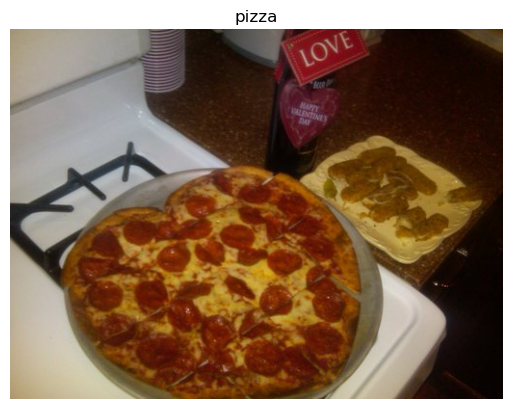

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    #set up the target directory(we will view images from here)
    target_folder = target_dir + r"\\"+ target_class
    print(target_folder)
    
    #get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    #read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + r"\\" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image_shape : {img.shape}") #show the shape of the image
    return img

pizza_steak_train = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"


img = view_random_image(target_dir = pizza_steak_train,target_class = "pizza")
    
    

In [13]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[158, 149, 118],
        [159, 150, 119],
        [159, 150, 119],
        ...,
        [ 70,  44,  11],
        [ 69,  43,  10],
        [ 68,  41,  11]],

       [[159, 150, 119],
        [159, 150, 119],
        [161, 150, 120],
        ...,
        [ 71,  45,  12],
        [ 72,  43,  11],
        [ 71,  42,  12]],

       [[159, 150, 119],
        [159, 150, 119],
        [161, 150, 120],
        ...,
        [ 77,  46,  15],
        [ 76,  45,  14],
        [ 74,  43,  14]],

       ...,

       [[173, 150, 109],
        [174, 151, 110],
        [174, 151, 110],
        ...,
        [ 11,   1,   2],
        [ 11,   1,   2],
        [ 11,   1,   2]],

       [[172, 149, 108],
        [173, 150, 109],
        [174, 151, 110],
        ...,
        [ 11,   1,   2],
        [ 12,   2,   3],
        [ 12,   2,   3]],

       [[173, 148, 108],
        [172, 149, 108],
        [173, 150, 109],
        ...,
        [ 12,   2,   

In [14]:
# view the image shape

img.shape #retuns height,width,colour channels

(384, 512, 3)

In [15]:
# get all the pixel values between 0 &  1
img/255.

array([[[0.61960784, 0.58431373, 0.4627451 ],
        [0.62352941, 0.58823529, 0.46666667],
        [0.62352941, 0.58823529, 0.46666667],
        ...,
        [0.2745098 , 0.17254902, 0.04313725],
        [0.27058824, 0.16862745, 0.03921569],
        [0.26666667, 0.16078431, 0.04313725]],

       [[0.62352941, 0.58823529, 0.46666667],
        [0.62352941, 0.58823529, 0.46666667],
        [0.63137255, 0.58823529, 0.47058824],
        ...,
        [0.27843137, 0.17647059, 0.04705882],
        [0.28235294, 0.16862745, 0.04313725],
        [0.27843137, 0.16470588, 0.04705882]],

       [[0.62352941, 0.58823529, 0.46666667],
        [0.62352941, 0.58823529, 0.46666667],
        [0.63137255, 0.58823529, 0.47058824],
        ...,
        [0.30196078, 0.18039216, 0.05882353],
        [0.29803922, 0.17647059, 0.05490196],
        [0.29019608, 0.16862745, 0.05490196]],

       ...,

       [[0.67843137, 0.58823529, 0.42745098],
        [0.68235294, 0.59215686, 0.43137255],
        [0.68235294, 0

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 & 1,also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our data directories
train_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"
test_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,batch_size = 32,target_size = (224,224),
                                                        class_mode = "binary",seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,batch_size = 32,target_size = (224,224),
                                               class_mode = "binary",seed =42)


#Build a CNN model(same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation ="sigmoid")
])

# compile the model
model_1.compile(loss =tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                       validation_data = valid_data,validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 544ms/step - accuracy: 0.5952 - loss: 0.6808 - val_accuracy: 0.6700 - val_loss: 0.5919
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 435ms/step - accuracy: 0.7592 - loss: 0.4919 - val_accuracy: 0.8100 - val_loss: 0.4165
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 433ms/step - accuracy: 0.8061 - loss: 0.4395 - val_accuracy: 0.8360 - val_loss: 0.3696


In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11560)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          11,561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,715 (170.77 KB)

 Trainable params: 14,571 (56.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,144 (113.85 KB)

# Using the same model as before

In [18]:
# set random seed

tf.random.set_seed(42)

#create a model to replciate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"]
               )

history_2 = model_2.fit(train_data,epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step - accuracy: 0.5063 - loss: 1.4957 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.5139 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


In [19]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [20]:
# despite having 20x more trainable parameters in model_2 as compared to model_1(CNN model, 
#the model_2 performs terribly....let's try an improve this

In [21]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (224,224,3)),
          tf.keras.layers.Dense(100,activation = "relu"),
          tf.keras.layers.Dense(100,activation = "relu"),
          tf.keras.layers.Dense(100,activation = "relu"),
          tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch = len(train_data),
            validation_data = valid_data, validation_steps = len(valid_data))



Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 401ms/step - accuracy: 0.5311 - loss: 7.9058 - val_accuracy: 0.7860 - val_loss: 0.5018
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 420ms/step - accuracy: 0.6981 - loss: 0.7467 - val_accuracy: 0.7900 - val_loss: 0.4687
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 453ms/step - accuracy: 0.6647 - loss: 0.9370 - val_accuracy: 0.7740 - val_loss: 0.5065


In [22]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [23]:
#Binary classification : let's break it down

#1. Become one with data

C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\\steak
['3333128.jpg']
image_shape : (512, 512, 3)
C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train\\pizza
['218142.jpg']
image_shape : (512, 382, 3)


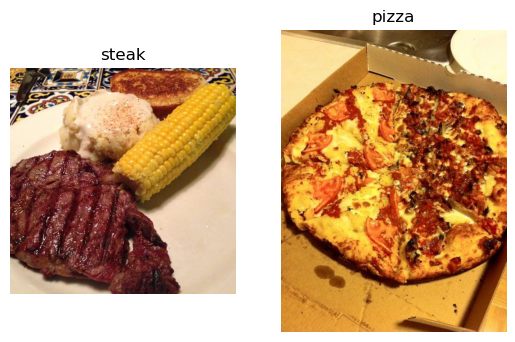

In [24]:
#visualize data

pizza_steak_train = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(pizza_steak_train,"steak")
plt.subplot(1,2,2)
pizza_img = view_random_image(pizza_steak_train,"pizza")

In [25]:
#2. Preprocess the data (prepare it for a model)

In [26]:
train_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"
test_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\test"

In [27]:
#Our next step is to turn our data into **batches**

#Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# load in our image data from directories and turn them into batches

In [29]:
train_data = train_datagen.flow_from_directory(directory = train_dir, # target directory of images
                                               class_mode = "binary", #type of data you are working with
                                               batch_size = 32, #size of minibatches to load data into
                                               target_size = (224,224)) # target size of images (height & width)
test_data = test_datagen.flow_from_directory(directory = test_dir,class_mode = "binary",batch_size = 32,target_size = (224,224))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of a train data batch

images,labels = train_data.__next__() #get the "next" batch of images/labels in train data
len(images),len(labels)

(32, 32)

In [31]:
# how many batches are there
len(train_data)

47

In [32]:
1500/32

46.875

In [33]:
#get the details of the images

In [34]:
images[:2],images.shape

(array([[[[0.07843138, 0.03921569, 0.03529412],
          [0.08235294, 0.03529412, 0.03529412],
          [0.09019608, 0.04313726, 0.04313726],
          ...,
          [0.8313726 , 0.6431373 , 0.49411768],
          [0.8235295 , 0.63529414, 0.48627454],
          [0.81568635, 0.627451  , 0.4784314 ]],
 
         [[0.08235294, 0.04313726, 0.03921569],
          [0.08627451, 0.03921569, 0.03921569],
          [0.09019608, 0.04313726, 0.04313726],
          ...,
          [0.82745105, 0.6392157 , 0.4901961 ],
          [0.8235295 , 0.63529414, 0.48627454],
          [0.8117648 , 0.62352943, 0.47450984]],
 
         [[0.08235294, 0.04313726, 0.03529412],
          [0.08235294, 0.03921569, 0.03137255],
          [0.08627451, 0.04313726, 0.03529412],
          ...,
          [0.8078432 , 0.61960787, 0.47058827],
          [0.8196079 , 0.6313726 , 0.48235297],
          [0.8196079 , 0.6313726 , 0.48235297]],
 
         ...,
 
         [[0.98823535, 0.74509805, 0.34901962],
          [0.98823

In [35]:
#view the first batch of labels

labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [36]:
# Create a CNN model (start with a baseline)

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential 

In [38]:
model_4 = Sequential([Conv2D(
    filters = 10, #filters is the number of sliding windows going across the input. (higher = more complex model)
    kernel_size=3, #the size of the sliding window going across the input
    strides = 1, #the size of the step the sliding window takes across the input
    padding="valid", # if "same" , output shape is same as input shape , if "valid" the output shape gets compressed
    activation = "relu",
    input_shape = (224,224,3)),  #input layer (specify input shape)
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1,activation = "sigmoid") #output layer (working with binary classification so only 1 output neuron)
])

In [39]:
model_4.compile(loss = "binary_crossentropy",
               optimizer = Adam(),
               metrics = ["accuracy"])

In [40]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#check the lengths of train & test data generators

len(train_data),len(test_data)

(47, 16)

In [42]:
#fit the model
history_4 = model_4.fit(train_data,epochs=5,
                       steps_per_epoch = len(train_data),
                    validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 485ms/step - accuracy: 0.6427 - loss: 0.7766 - val_accuracy: 0.8080 - val_loss: 0.4302
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 505ms/step - accuracy: 0.7958 - loss: 0.4513 - val_accuracy: 0.8240 - val_loss: 0.4122
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 523ms/step - accuracy: 0.8788 - loss: 0.3073 - val_accuracy: 0.8420 - val_loss: 0.3679


In [43]:
#Evaluating our model

#It looks like our model is learning something, let's evaluate it

##import pandas as pd
##pd.DataFrame(history_4.history).plot(figsize = (10,7));

<Axes: >

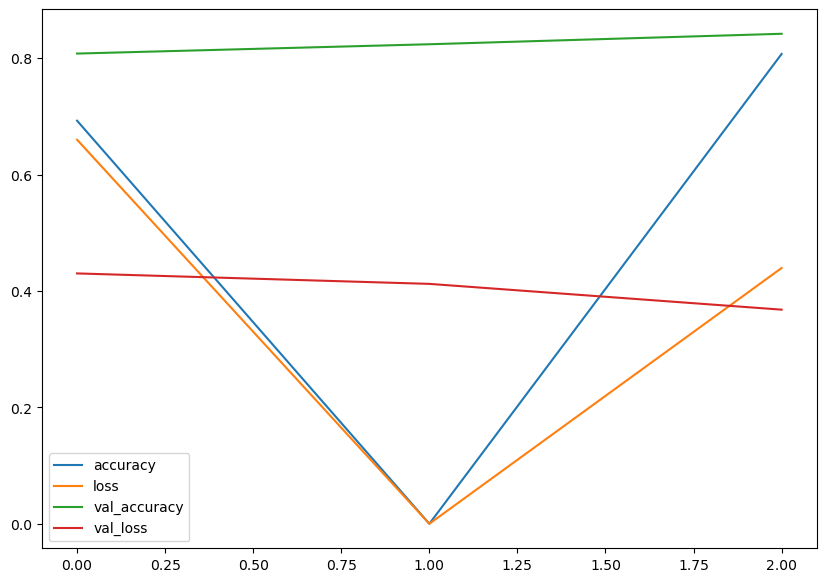

In [44]:
import pandas as pd
min_len = min([len(v) for v in history_4.history.values()])
for key in history_4.history.keys():
    history_4.history[key] = history_4.history[key][:min_len]

pd.DataFrame(history_4.history).plot(figsize=(10,7))


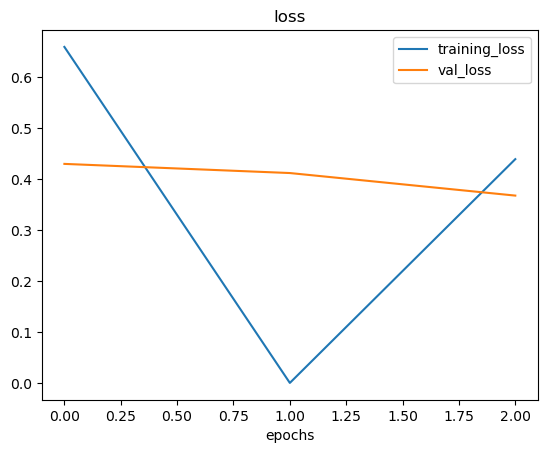

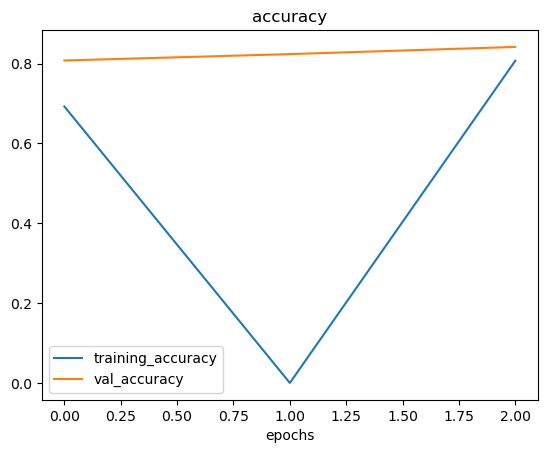

In [45]:
# plot the validation and training curves separately

def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
                   
    #plot the loss
    plt.figure()                   
    plt.plot(epochs,loss,label = "training_loss")
    plt.plot(epochs,val_loss,label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
                   
    #plot the accuracy
    plt.figure()
    plt.plot(epochs,accuracy, label = "training_accuracy")
    plt.plot(epochs,val_accuracy,label = "val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
                   
plot_loss_curves(history_4)

#**note** : When a model's **validation loss starts to increase**,it's likely that the model is **overfitting** the training #data set. This means,its learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished

#Adjust the modelparameters

Fitting a machine learning model comes in 3 steps
0. create a base line
1. Beat the basline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting
1) Increase the number of Conv layers
2) Increase the number of Conv filters
3) Add another dense layer to the output of our flattened layer


Reduce overfitting
1) Add data augmentation
2) Add regularization layers (such as MaxPool2D)
3) Add more data....



In [46]:
# Create a model (this is going to be our baseline)
model_5 = Sequential([
          Conv2D(10,3,activation =  "relu",input_shape = (224,224,3)),
          MaxPool2D(pool_size = 2),
          Conv2D(10,3,activation = "relu"),
          MaxPool2D(),
          Conv2D(10,3,activation = "relu"),
          MaxPool2D(),
          Flatten(),
          Dense(1,activation = "sigmoid")
])

model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


history_5 = model_5.fit(train_data,epochs=5,validation_data = test_data,
                        steps_per_epoch = len(train_data),validation_steps = len(test_data))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.5875 - loss: 0.6575 - val_accuracy: 0.7820 - val_loss: 0.4825
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.7395 - loss: 0.5186 - val_accuracy: 0.8380 - val_loss: 0.3841
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.8216 - loss: 0.4128 - val_accuracy: 0.8200 - val_loss: 0.4004


In [47]:
#Get a summary of our model with max pooling

model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

<Axes: >

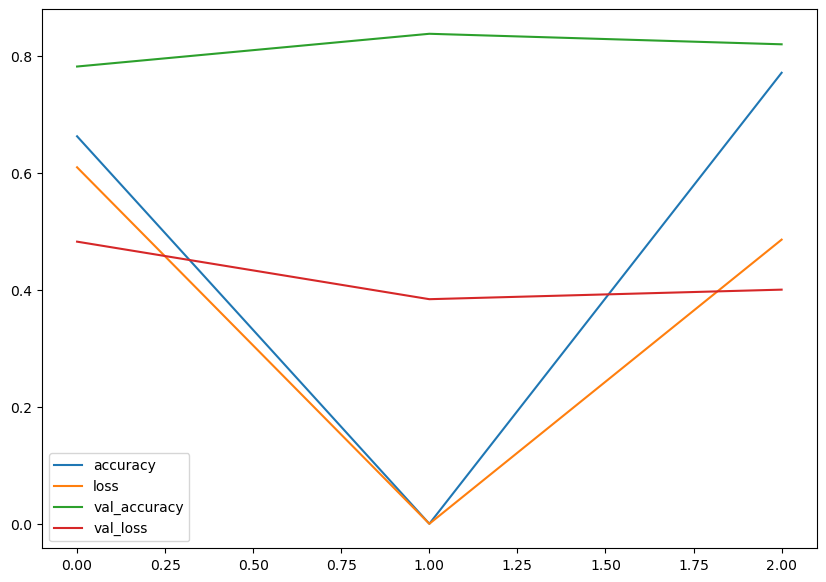

In [48]:
min_len = min([len(v) for v in history_5.history.values()])
for key in history_5.history.keys():
    history_5.history[key] = history_5.history[key][:min_len]

pd.DataFrame(history_5.history).plot(figsize=(10,7))

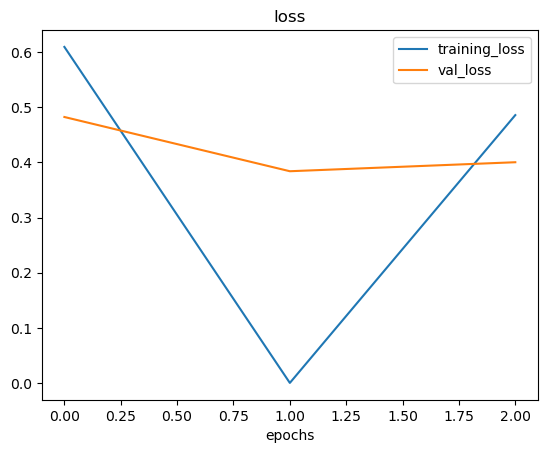

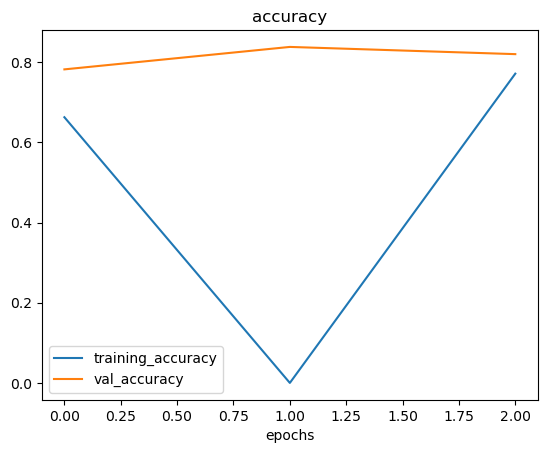

In [49]:
# Plot loss curves

plot_loss_curves(history_5)

# opening our bag of tricks and finding data augmentation

# Create imageDatGenerator training instance with data augmentation

In [50]:
train_datagen_augmented = ImageDataGenerator(rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1/255.)

#Create imagedatagenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#Create imagedatagenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)



Question : What is data augmentation?
Data augmentation is the process of alterimg our training data,
leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully)  patterns
Altering might mean adjusting the rotation of an image,flipping it,cropping it or something similar

In [51]:
# Import Data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir
                                                                   ,batch_size = 32,
                                                                   class_mode = "binary",
                                                                target_size = (224,224),
                                                                shuffle = False)

print("Non augmented training data")

train_data = train_datagen.flow_from_directory(directory =  train_dir,
                                               batch_size = 32,
                                               class_mode = "binary",
                                               target_size = (224,224),
                                               shuffle = False)

print("Non augmented test data")
test_data = test_datagen.flow_from_directory(directory = test_dir,batch_size = 32,class_mode = "binary",
                                            target_size = (224,224))

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


In [52]:
# get sample data batches
images,labels = train_data.__next__()
augmented_images,augmented_labels = train_data_augmented.__next__()

showing image number : 14


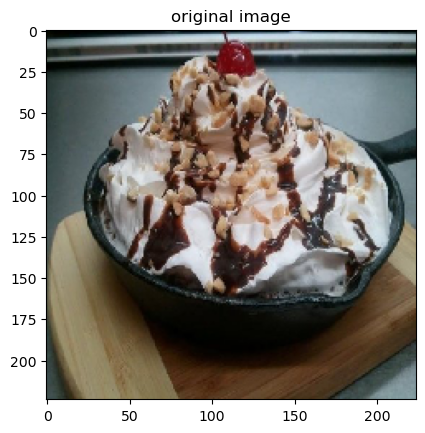

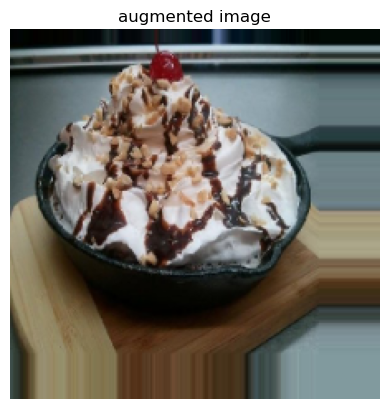

In [53]:
# show original image and augmented image

import random
random_number =random.randint(0,31)
print(f"showing image number : {random_number}")

plt.imshow(images[random_number])
plt.title(f"original image")
plt.figure()
plt.axis(False)

plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False);

In [54]:
# Now we have seen how augmented training data looks like, let's build a model and see how it learns on augmented data

In [55]:
model_6 = Sequential([
    Conv2D (10,3,activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - accuracy: 0.4151 - loss: 0.7238 - val_accuracy: 0.5460 - val_loss: 0.6926
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 608ms/step - accuracy: 0.5189 - loss: 0.6929 - val_accuracy: 0.5880 - val_loss: 0.6903
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.5355 - loss: 0.7079 - val_accuracy: 0.6020 - val_loss: 0.6829


<Axes: >

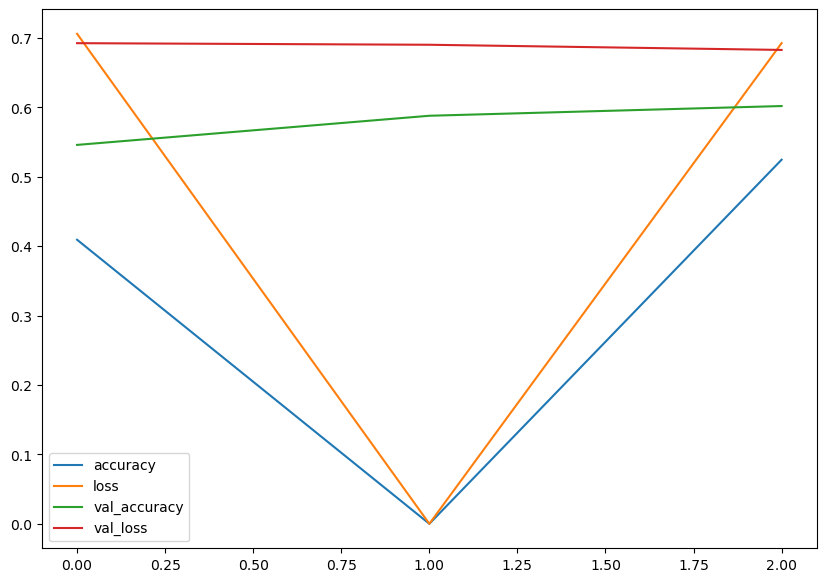

In [56]:
min_len = min([len(v) for v in history_6.history.values()])
for key in history_6.history.keys():
    history_6.history[key] = history_6.history[key][:min_len]

pd.DataFrame(history_6.history).plot(figsize=(10,7))

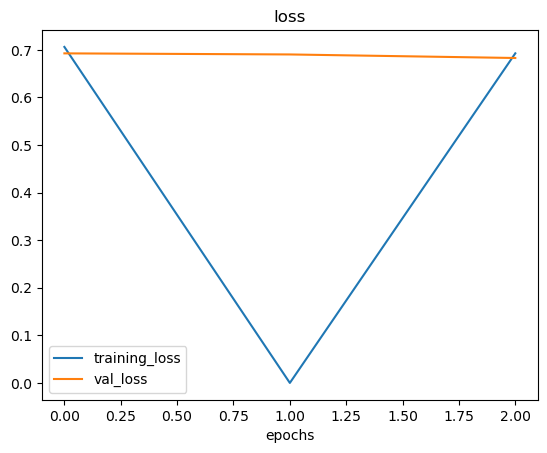

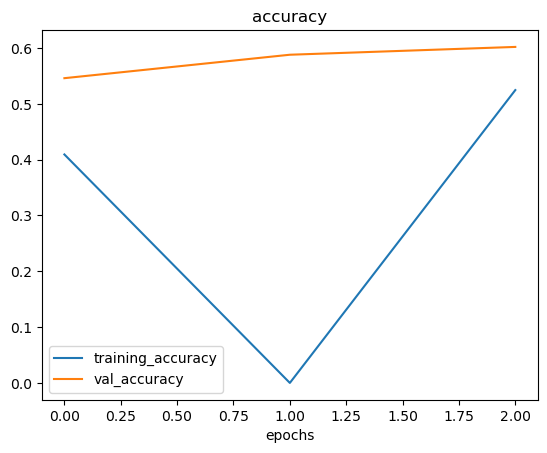

In [57]:
plot_loss_curves(history_6)

In [58]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir
                                                                   ,batch_size = 32,
                                                                   class_mode = "binary",
                                                                target_size = (224,224),
                                                                shuffle = True)

Found 1500 images belonging to 2 classes.


In [59]:
model_7 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
               optimizer = Adam(),
               metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,epochs = 10,
                         steps_per_epoch = len(train_data_augmented_shuffled),
                         validation_data = test_data,
                         validation_steps = len(test_data))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 683ms/step - accuracy: 0.5405 - loss: 0.6867 - val_accuracy: 0.7300 - val_loss: 0.5685
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 751ms/step - accuracy: 0.7262 - loss: 0.5660 - val_accuracy: 0.7920 - val_loss: 0.4278
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 862ms/step - accuracy: 0.7592 - loss: 0.5101 - val_accuracy: 0.8280 - val_loss: 0.3701
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 783ms/step - accuracy: 0.7666 - loss: 0.4833 - val_accuracy: 0.7980 - val_loss: 0.4289
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.7778 - loss: 0.4599 - val_accuracy: 0.8500 - val_loss: 0.3473
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


<Axes: >

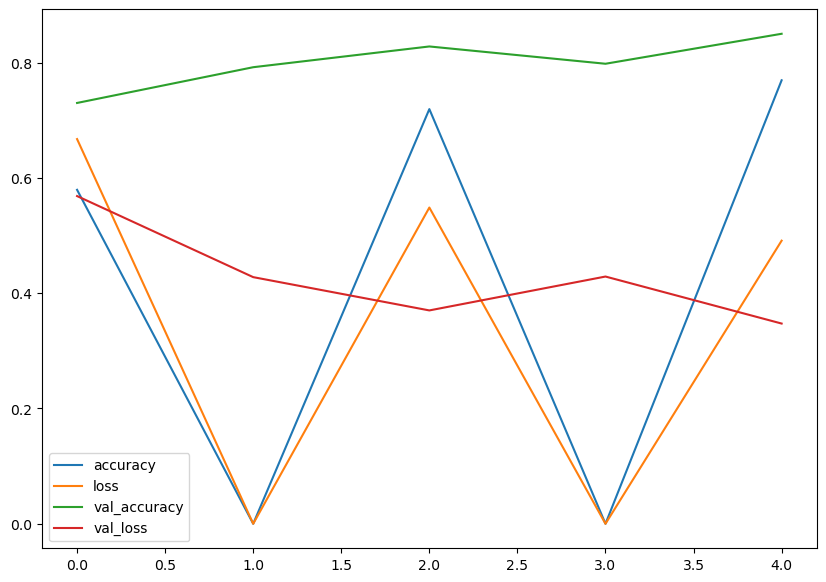

In [60]:
min_len = min([len(v) for v in history_7.history.values()])
for key in history_7.history.keys():
    history_7.history[key] = history_7.history[key][:min_len]

pd.DataFrame(history_7.history).plot(figsize=(10,7))

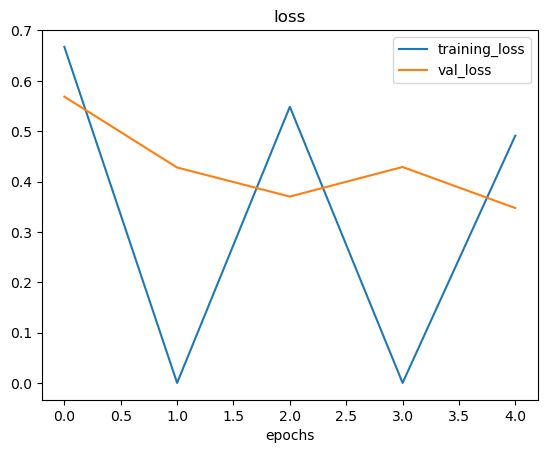

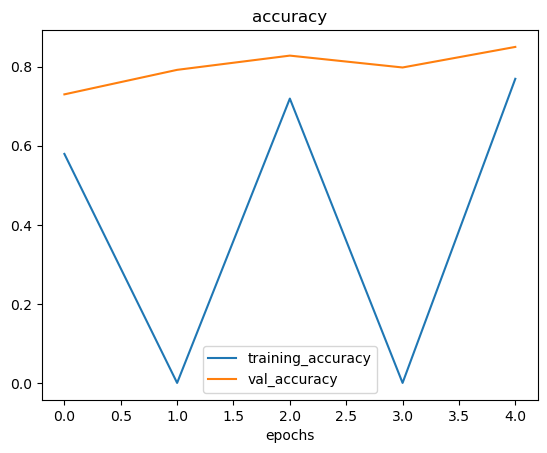

In [61]:
plot_loss_curves(history_7)

# Repeat until satisfied

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

Increase the number of model layers (e.g. add more convolutional layers).
Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
Train for longer (more epochs).
Finding an ideal learning rate.
Get more data (give the model more opportunities to learn).
Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).

In [62]:
# model_1 being tweaked so as to get the advantages of augmented shuffled data

In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 & 1,also called scaling/normalization)

train_datagen_augmented = ImageDataGenerator(rotation_range=0.2,width_shift_range=0.2,
                                            height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                            rescale=1/255.)

##train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our data directories
train_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\train"
test_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\pizza_steak\test"

#import data from directories and turn it into batches
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,batch_size = 32,target_size = (224,224),
                                                        class_mode = "binary",seed=42,shuffle = True)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,batch_size = 32,target_size = (224,224),
                                               class_mode = "binary",seed =42)


#Build a CNN model(same as the tiny VGG on the CNN explainer website)
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3,padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation ="sigmoid")
])

# compile the model
model_8.compile(loss =tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,epochs=10,steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data = valid_data,validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5639 - loss: 0.6793 - val_accuracy: 0.8080 - val_loss: 0.4505
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7419 - loss: 0.5305 - val_accuracy: 0.8260 - val_loss: 0.3667
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7528 - loss: 0.4929 - val_accuracy: 0.8600 - val_loss: 0.3317
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7880 - loss: 0.4506 - val_accuracy: 0.7420 - val_loss: 0.5024
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7742 - loss: 0.5041 - val_accuracy: 0.8300 - val_loss: 0.3774
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [64]:
# Making a prediction with our trained model on our own custom data

#classes we are working with

print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

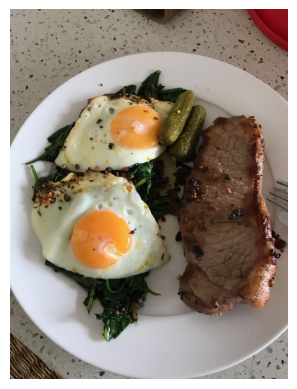

In [65]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak_image = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\images\03-steak.jpeg"
steak_image

steak = mpimg.imread(steak_image)
plt.imshow(steak)
plt.axis(False)

In [66]:
#check the shape of our image
steak.shape

(4032, 3024, 3)

In [67]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [68]:
try:
    model_7.predict(steak)
except:
    print("error")

error


In [69]:
tf.expand_dims(steak,axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [70]:
expanded_steak = tf.expand_dims(steak,axis=0)

In [71]:
#Note: For your model to make predictions on unseen data, for example, your 
#own custom images, the custom image has to be in the same shape as your model has 
#been trained on. In more general terms, to make predictions on custom data it has to be in the same form 
#that your model has been trained on.

In [72]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename,img_shape = 224):
    """
      Reads an image from filename, turns it into a tensor
      and reshapes it to (img_shape, img_shape, colour_channel).
    """
    #read in the image
    img = tf.io.read_file(filename)
    
    # Decode the read file into a tensor
    img = tf.image.decode_image(img,channels = 3)
    
    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img,size = [img_shape,img_shape])
    
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [73]:
steak = load_and_prep_image(steak_image)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [74]:
steak.shape

TensorShape([224, 224, 3])

In [75]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[0.78193986]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [76]:
# remind ourselves of the calss names

class_names

array(['pizza', 'steak'], dtype='<U5')

In [77]:
# We can index the predicted class by rounding the prediction probability

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [78]:
def pred_and_plot(filename, model,class_names = class_names):
    """
      Imports an image located at filename, makes a prediction on it with
      a trained model and plots the image with the predicted class as the title.
    """
      # Import the target image and preprocess it    
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img,axis =0))
    
    #get the predicted class
    pred_class = class_names[(int(tf.round(pred)))]
    
    #plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
                            

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


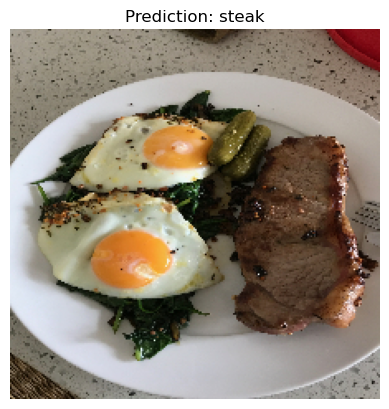

In [79]:
pred_and_plot(steak_image,model_7)

Nice! Our model got the prediction right.

The only downside of working with food is this is making me hungry.

Let's try one more image.

In [80]:
pizza_image = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\images\03-pizza-dad.jpeg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


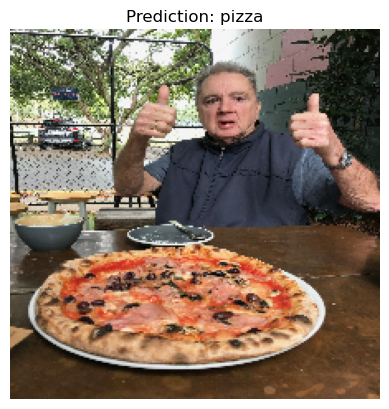

In [81]:
pred_and_plot(pizza_image,model_7)

Multi-class Classification
We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

Become one with the data (visualize, visualize, visualize...)
Preprocess the data (prepare it for a model)
Create a model (start with a baseline)
Fit the model
Evaluate the model
Adjust different parameters and improve model (try to beat your baseline)
Repeat until satisfied

Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

Become one with the data (visualize, visualize, visualize...)
Preprocess the data (prepare it for a model)
Create a model (start with a baseline)
Fit the model
Evaluate the model
Adjust different parameters and improve model (try to beat your baseline)
Repeat until satisfied

1.BECOMING ONE WITH THE DATA

In [82]:
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
response_all = requests.get(url)

with open("10_food_classes_all_data.zip", "wb") as file:
    file.write(response_all.content)


In [83]:
%pwd

%cd C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data

import os

directory = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data"

# List all files and directories in the specified directory
for item in os.listdir(directory):
    print(item)

C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data
pizza_steak.zip
saved_trained_model_11.h5
test
train


In [84]:
# walk through 10 classes of food image data

food_class = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data"

for dirpath,dirnames,filenames in os.walk(food_class):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

there are 2 directories and 2 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data'. 
there are 10 directories and 0 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test'. 
there are 0 directories and 250 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test\chicken_curry'. 
there are 0 directories and 250 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test\chicken_wings'. 
there are 0 directories and 250 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test\fried_rice'. 
there are 0 directories and 250 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test\grilled_salmon'. 
there are 0 directories and 250 images in 'C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test\hamburger'. 
there are 0 directories and 250 im

In [85]:
# set up train and test directories
train_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\train"
test_dir = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\test"

In [86]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\train\\grilled_salmon
['3145643.jpg']
image_shape : (288, 512, 3)


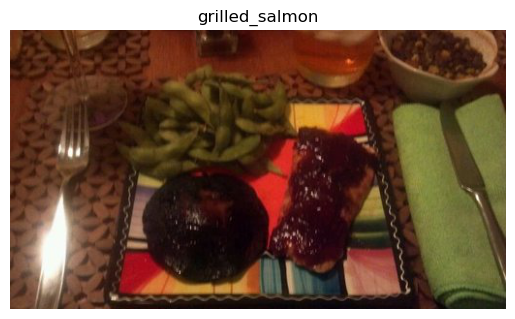

In [87]:
img = view_random_image(target_dir = train_dir,target_class = random.choice(class_names))

2. PREPARING OUR DATA (TURNING IT INTO TENSORS)

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,target_size = (224,224),
                                             batch_size=32,class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


3. Create a model (Start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:

Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model_9 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model_9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



4.Fit a model

In [90]:
history_9 = model_9.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 149s 614ms/step - accuracy: 0.1799 - loss: 2.2050 - val_accuracy: 0.3084 - val_loss: 1.9691
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 464ms/step - accuracy: 0.3450 - loss: 1.8650 - val_accuracy: 0.3484 - val_loss: 1.8907
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 478ms/step - accuracy: 0.4738 - loss: 1.5502 - val_accuracy: 0.3120 - val_loss: 2.0400


5. Evaluate the model

In [91]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.3014 - loss: 2.0742


[2.040022850036621, 0.31200000643730164]

<Axes: >

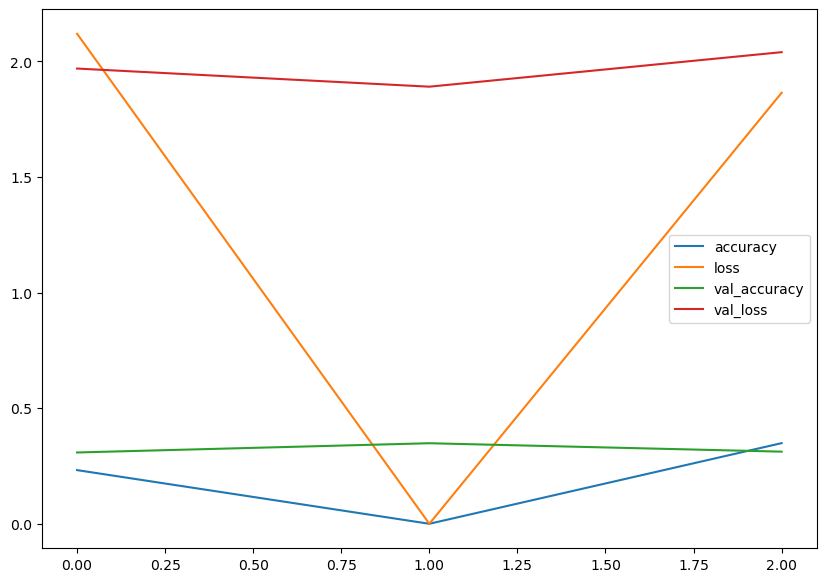

In [92]:
min_len = min([len(v) for v in history_9.history.values()])
for key in history_9.history.keys():
    history_9.history[key] = history_9.history[key][:min_len]

pd.DataFrame(history_9.history).plot(figsize=(10,7))

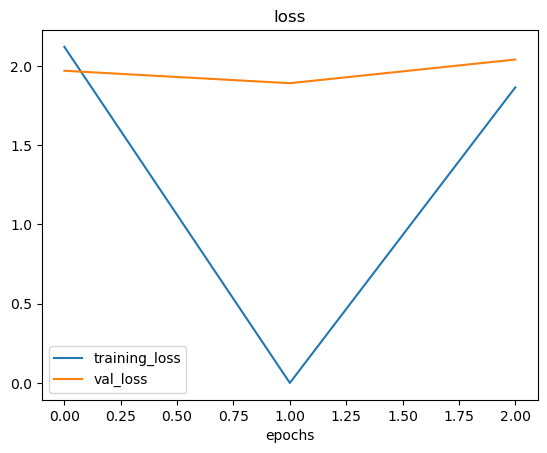

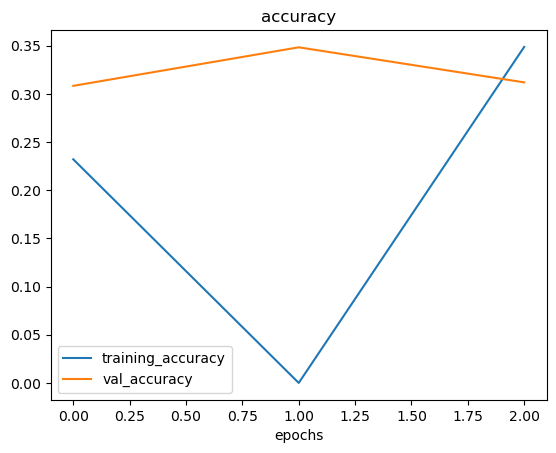

In [93]:
plot_loss_curves(history_9)

6. Adjust the model parameters
Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [94]:
model_9.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [95]:
model_10 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"] 
                )

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model_10.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
history_10 = model_10.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
             validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 380ms/step - accuracy: 0.1623 - loss: 2.3899 - val_accuracy: 0.2672 - val_loss: 2.1014
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 383ms/step - accuracy: 0.3354 - loss: 1.9325 - val_accuracy: 0.3196 - val_loss: 1.9225
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 392ms/step - accuracy: 0.4675 - loss: 1.5995 - val_accuracy: 0.3236 - val_loss: 1.9776


<Axes: >

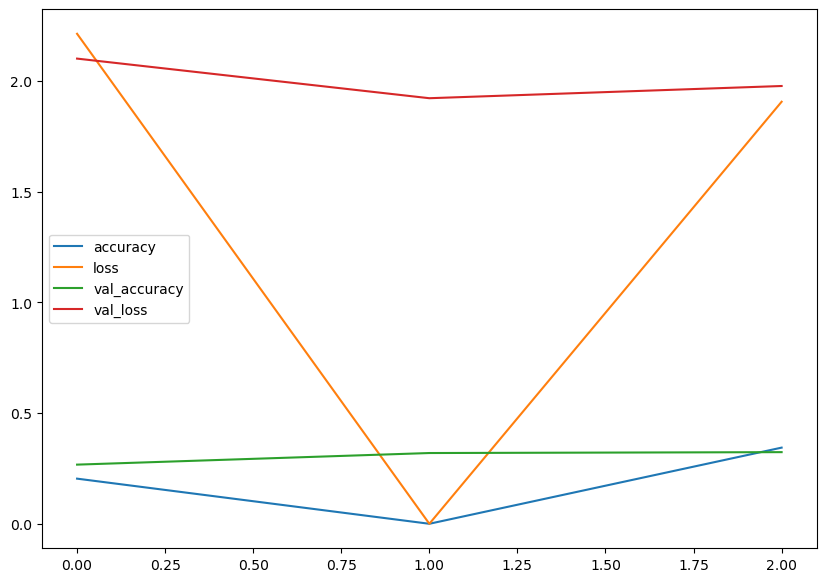

In [98]:
min_len = min([len(v) for v in history_10.history.values()])
for key in history_7.history.keys():
    history_10.history[key] = history_10.history[key][:min_len]

pd.DataFrame(history_10.history).plot(figsize=(10,7))

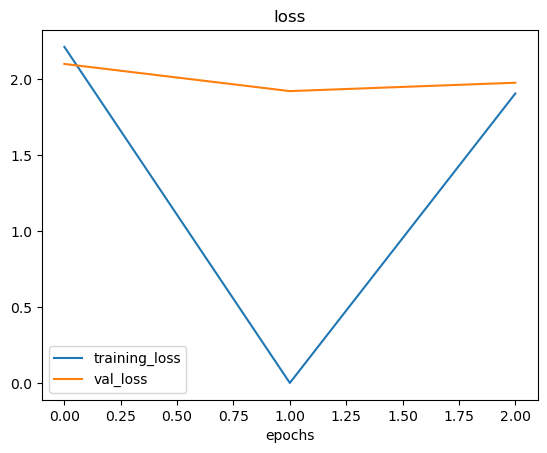

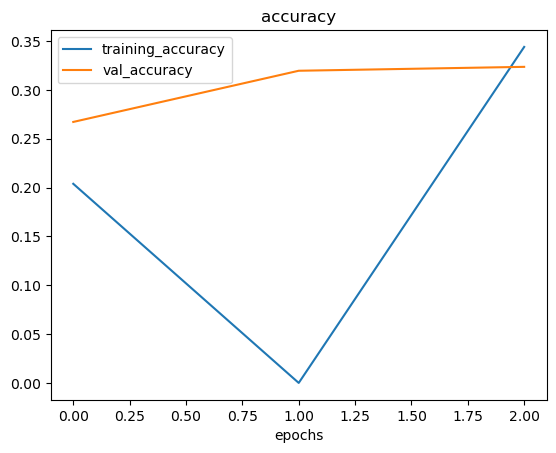

In [99]:
plot_loss_curves(history_10)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about **data augmentation**?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range = 20,
    rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size = (224,224),
                                                               batch_size=32,
                                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [101]:
model_11 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model_9.summary() , model_11.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

(None, None)

In [ ]:
history_11 = model_11.fit(train_data_augmented,epochs = 10,steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/235 ━━━━━━━━━━━━━━━━━━━━ 1:49 839ms/step - accuracy: 0.1211 - loss: 2.2948

In [ ]:
model_9.evaluate(test_data)

In [ ]:
model_11.evaluate(test_data)

In [ ]:
min_len = min([len(v) for v in history_11.history.values()])
for key in history_11.history.keys():
    history_11.history[key] = history_11.history[key][:min_len]

pd.DataFrame(history_11.history).plot(figsize=(10,7))

In [ ]:
plot_loss_curves(history_11)

7. Repeat until satisfied
We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

Making a prediction with our trained model
What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [ ]:
class_names

In [ ]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

hamburger_image = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\images\03-hamburger.jpeg"
hamburger_image

sushi_image = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\images\03-sushi.jpeg"
sushi_image

pizza_image = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\images\03-pizza-dad.jpeg"
pizza_image

steak_image = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\tensorflow-deep-learning-main\images\03-steak.jpeg"
steak_image



In [ ]:
try:
    pred_and_plot(filname = hamburger_image,model=model_11,class_names = class_names)
except:
    print('there is error')

In [ ]:
def pred_and_plot(filename, model,class_names = class_names):
    """
      Imports an image located at filename, makes a prediction on it with
      a trained model and plots the image with the predicted class as the title.
    """
      # Import the target image and preprocess it    
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img,axis =0))
    
    # add in logic for multi class & get pred class name
    if len(pred[0])>1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[(int(tf.round(pred[0])))]
    
    #plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
                            

In [ ]:
pred_and_plot(filename = hamburger_image,model=model_11,class_names = class_names)

Saving and loading our model
Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the save and load_model functions.

In [ ]:
#save a model
model_11.save("saved_trained_model_11.h5")

In [ ]:
saved_trained_model_11 = r"C:\Users\Admin\TENSORFLOW BY GOOGLE\Tensorflow basics\10_food_classes_all_data\saved_trained_model_11.h5"

In [ ]:
loaded_model_11 = tf.keras.models.load_model(saved_trained_model_11)
loaded_model_11.evaluate(test_data)

In [ ]:
model_11.evaluate(test_data)